## Assignment 2: Binary Classification Example

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers

### 3.4 Example using credit data (from a previous class)

In [26]:
# import data (pre-split into training and testing sets)
training = pd.read_csv("credit_train.csv")
testing = pd.read_csv("credit_test.csv")
print(training.head())
print(training.info()) 

# data is based on credit card data 
# output variable (default) is whether the customer defaulted on their debt

# extracting only values gets rid of the dataframe column headings
training_set = training.values
testing_set = testing.values

# first column is output (default)
train_data = training_set[:,1:9]
test_data = testing_set[:,1:9]

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

train_label = training_set[:,0]
test_label = testing_set[:,0]

# splitting the training data into two for validation while training
x_val = train_data[:10000]
x_train = train_data[10000:]
y_val = train_label[:10000]
y_train = train_label[10000:]

   default  utilization  age  debt_ratio  income  open_credit_lines  \
0        1     0.766127   45    0.802982  9120.0                 13   
1        0     0.957151   40    0.121876  2600.0                  4   
2        0     0.658180   38    0.085113  3042.0                  2   
3        0     0.233810   30    0.036050  3300.0                  5   
4        0     0.213179   74    0.375607  3500.0                  3   

   real_estate_loan  dependents  ever_past_due  
0                 1           2              1  
1                 0           1              0  
2                 0           0              1  
3                 0           0              0  
4                 1           1              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73304 entries, 0 to 73303
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            73304 non-null  int64  
 1   utilization        733

In [50]:
print(train_data.shape)
print(test_data.shape)

(73304, 8)
(12936, 8)


In [27]:
# the base model (the model compared against in further experiments)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(8,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# fits the model with 20 epochs and only some of the training data to validate model
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history

# generates metrics to be graphed 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc'] 

Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 0.5021 - acc: 0.7983 - val_loss: 0.2777 - val_acc: 0.9370
Epoch 2/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2423 - acc: 0.9325 - val_loss: 0.2177 - val_acc: 0.9370
Epoch 3/20
124/124 [==============================] - 0s 960us/step - loss: 0.2237 - acc: 0.9325 - val_loss: 0.2130 - val_acc: 0.9370
Epoch 4/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2205 - acc: 0.9325 - val_loss: 0.2110 - val_acc: 0.9370
Epoch 5/20
124/124 [==============================] - 0s 973us/step - loss: 0.2190 - acc: 0.9325 - val_loss: 0.2099 - val_acc: 0.9370
Epoch 6/20
124/124 [==============================] - 0s 976us/step - loss: 0.2180 - acc: 0.9325 - val_loss: 0.2089 - val_acc: 0.9370
Epoch 7/20
124/124 [==============================] - 0s 963us/step - loss: 0.2173 - acc: 0.9325 - val_loss: 0.2085 - val_acc: 0.9370
Epoch 8/20
124/124 [==============================] - 0s 972us/step 

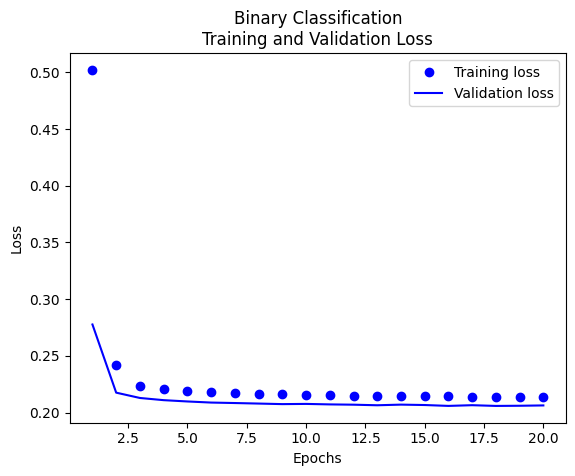

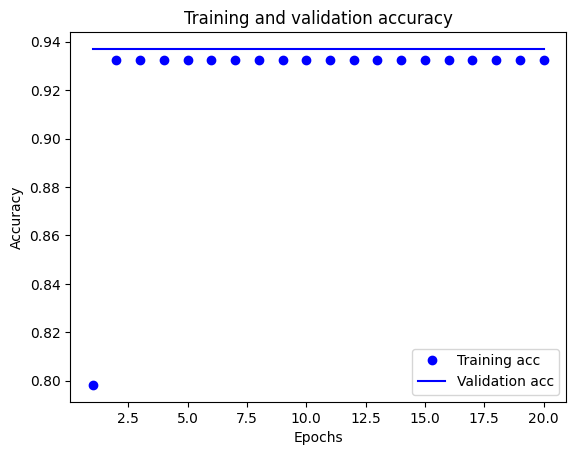

In [28]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Binary Classification\nTraining and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

plt.clf() # Clears the figure
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
# uses 4 epochs based on the textbook example (not necessarily the optimal amount of epochs)
base = model.fit(train_data, train_label, epochs=4, batch_size=512)

print() # blank line for formatting
results = model.evaluate(test_data, test_label) 

# prints out the results as an array [test loss, test accuracy]
results

Epoch 1/4
144/144 [==============================] - 0s 948us/step - loss: 0.2118 - acc: 0.9331
Epoch 2/4
144/144 [==============================] - 0s 730us/step - loss: 0.2118 - acc: 0.9331
Epoch 3/4
144/144 [==============================] - 0s 733us/step - loss: 0.2117 - acc: 0.9331
Epoch 4/4
144/144 [==============================] - 0s 893us/step - loss: 0.2116 - acc: 0.9331

405/405 [==============================] - 0s 687us/step - loss: 0.2189 - acc: 0.9312


[0.21893899142742157, 0.9311997294425964]

In [46]:
np.mean(base.history['acc']) - results[1]   # training - testing accuracy 

0.001900792121887207

In [30]:
# won't output binary values instead they are probabilities that the prediction is positive
# (the person will default)
model.predict(test_data) 

405/405 [==============================] - 0s 471us/step


array([[0.04859343],
       [0.06247739],
       [0.01777434],
       ...,
       [0.30227715],
       [0.00617026],
       [0.19192016]], dtype=float32)

### Further experiments

#### Experiment #1

You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [52]:

model1a = models.Sequential()
model1a.add(layers.Dense(16, activation='relu', input_shape=(8,)))
# gets rid of this second layer here
model1a.add(layers.Dense(1, activation='sigmoid'))

model1a.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model1a.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model1a.fit(train_data, train_label, epochs=4, batch_size=512)

results1a = model1a.evaluate(test_data, test_label) 

Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 0.5485 - acc: 0.7401 - val_loss: 0.3391 - val_acc: 0.9257
Epoch 2/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2790 - acc: 0.9300 - val_loss: 0.2300 - val_acc: 0.9369
Epoch 3/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2304 - acc: 0.9325 - val_loss: 0.2139 - val_acc: 0.9370
Epoch 4/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2225 - acc: 0.9325 - val_loss: 0.2105 - val_acc: 0.9370
Epoch 5/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2200 - acc: 0.9325 - val_loss: 0.2093 - val_acc: 0.9370
Epoch 6/20
124/124 [==============================] - 0s 976us/step - loss: 0.2186 - acc: 0.9325 - val_loss: 0.2084 - val_acc: 0.9370
Epoch 7/20
124/124 [==============================] - 0s 909us/step - loss: 0.2176 - acc: 0.9325 - val_loss: 0.2079 - val_acc: 0.9370
Epoch 8/20
124/124 [==============================] - 0s 939us/step - lo

In [53]:
model1b = models.Sequential()
model1b.add(layers.Dense(16, activation='relu', input_shape=(8,)))
model1b.add(layers.Dense(16, activation='relu'))
# adds a second layer with the relu activation function to be the 3rd hidden layer
model1b.add(layers.Dense(16, activation='relu'))
model1b.add(layers.Dense(1, activation='sigmoid'))

model1b.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model1b.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model1b.fit(train_data, train_label, epochs=4, batch_size=512)

results1b = model1b.evaluate(test_data, test_label) 

Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 0.3333 - acc: 0.9296 - val_loss: 0.2188 - val_acc: 0.9370
Epoch 2/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2249 - acc: 0.9325 - val_loss: 0.2108 - val_acc: 0.9370
Epoch 3/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2197 - acc: 0.9325 - val_loss: 0.2088 - val_acc: 0.9370
Epoch 4/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2177 - acc: 0.9325 - val_loss: 0.2079 - val_acc: 0.9370
Epoch 5/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2166 - acc: 0.9325 - val_loss: 0.2067 - val_acc: 0.9370
Epoch 6/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.9325 - val_loss: 0.2070 - val_acc: 0.9370
Epoch 7/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2156 - acc: 0.9325 - val_loss: 0.2063 - val_acc: 0.9370
Epoch 8/20
124/124 [==============================] - 0s 1ms/step - loss: 0.

In [54]:
print("Test Results:")
print("   1 Hidden Layer  =", results1a)
print("   Base (2 Layers) =", results)
print("   3 Hidden Layers =", results1b)

Test Results:
   1 Hidden Layer  = [0.21937890350818634, 0.9311997294425964]
   Base (2 Layers) = [0.21893899142742157, 0.9311997294425964]
   3 Hidden Layers = [0.2183694988489151, 0.9311997294425964]


#### Experiment #2

Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [34]:
model2a = models.Sequential()
# changes the hidden units from 16 to 32
model2a.add(layers.Dense(32, activation='relu', input_shape=(8,)))
model2a.add(layers.Dense(32, activation='relu'))
model2a.add(layers.Dense(1, activation='sigmoid'))

model2a.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history2a = model2a.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model2a.fit(train_data, train_label, epochs=4, batch_size=512)

results2a = model2a.evaluate(test_data, test_label) 

Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 0.3545 - acc: 0.8897 - val_loss: 0.2175 - val_acc: 0.9370
Epoch 2/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2208 - acc: 0.9325 - val_loss: 0.2103 - val_acc: 0.9370
Epoch 3/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2174 - acc: 0.9325 - val_loss: 0.2078 - val_acc: 0.9370
Epoch 4/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.9325 - val_loss: 0.2090 - val_acc: 0.9371
Epoch 5/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2154 - acc: 0.9325 - val_loss: 0.2064 - val_acc: 0.9370
Epoch 6/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2148 - acc: 0.9325 - val_loss: 0.2069 - val_acc: 0.9371
Epoch 7/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2145 - acc: 0.9325 - val_loss: 0.2062 - val_acc: 0.9370
Epoch 8/20
124/124 [==============================] - 0s 1ms/step - loss: 0.

In [35]:
model2b = models.Sequential()
# changes the hidden units from 16 to 32
model2b.add(layers.Dense(64, activation='relu', input_shape=(8,)))
model2b.add(layers.Dense(64, activation='relu'))
model2b.add(layers.Dense(1, activation='sigmoid'))

model2b.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history2b = model2b.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model2b.fit(train_data, train_label, epochs=4, batch_size=512)

results2b = model2b.evaluate(test_data, test_label) 

Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 0.2476 - acc: 0.9324 - val_loss: 0.2103 - val_acc: 0.9370
Epoch 2/20
124/124 [==============================] - 0s 2ms/step - loss: 0.2181 - acc: 0.9325 - val_loss: 0.2075 - val_acc: 0.9370
Epoch 3/20
124/124 [==============================] - 0s 2ms/step - loss: 0.2158 - acc: 0.9325 - val_loss: 0.2064 - val_acc: 0.9370
Epoch 4/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2147 - acc: 0.9325 - val_loss: 0.2056 - val_acc: 0.9370
Epoch 5/20
124/124 [==============================] - 0s 2ms/step - loss: 0.2140 - acc: 0.9325 - val_loss: 0.2048 - val_acc: 0.9370
Epoch 6/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2136 - acc: 0.9325 - val_loss: 0.2053 - val_acc: 0.9370
Epoch 7/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2133 - acc: 0.9324 - val_loss: 0.2061 - val_acc: 0.9370
Epoch 8/20
124/124 [==============================] - 0s 2ms/step - loss: 0.

In [36]:
print("Test Results:")
print("   Base (16 Units) =", results)
print("   32 Hidden Units =", results2a)
print("   64 Hidden Units =", results2b)

Test Results:
   Base (16 Units) = [0.219853013753891, 0.9311997294425964]
   32 Hidden Units = [0.2175404131412506, 0.9311997294425964]
   64 Hidden Units = [0.2189835011959076, 0.9311997294425964]


#### Experiment #3

Try using the mse loss function instead of binary_crossentropy.

In [37]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(8,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

# changes loss function from binary_crossentropy to mse in the compilation step
model3.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

history3 = model3.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model3.fit(train_data, train_label, epochs=4, batch_size=512)

results3 = model3.evaluate(test_data, test_label) 

Epoch 1/20
124/124 [==============================] - 0s 2ms/step - loss: 0.1060 - acc: 0.9054 - val_loss: 0.0590 - val_acc: 0.9370
Epoch 2/20
124/124 [==============================] - 0s 943us/step - loss: 0.0597 - acc: 0.9325 - val_loss: 0.0560 - val_acc: 0.9370
Epoch 3/20
124/124 [==============================] - 0s 943us/step - loss: 0.0587 - acc: 0.9325 - val_loss: 0.0555 - val_acc: 0.9370
Epoch 4/20
124/124 [==============================] - 0s 949us/step - loss: 0.0584 - acc: 0.9325 - val_loss: 0.0552 - val_acc: 0.9370
Epoch 5/20
124/124 [==============================] - 0s 940us/step - loss: 0.0582 - acc: 0.9325 - val_loss: 0.0551 - val_acc: 0.9370
Epoch 6/20
124/124 [==============================] - 0s 942us/step - loss: 0.0580 - acc: 0.9325 - val_loss: 0.0552 - val_acc: 0.9370
Epoch 7/20
124/124 [==============================] - 0s 1ms/step - loss: 0.0579 - acc: 0.9325 - val_loss: 0.0550 - val_acc: 0.9370
Epoch 8/20
124/124 [==============================] - 0s 1ms/step 

In [38]:
print("Test Results:")
print("   Entropy =", results)
print("   MSE     =", results3)

Test Results:
   Entropy = [0.219853013753891, 0.9311997294425964]
   MSE     = [0.05880967900156975, 0.9311997294425964]


#### Experiment #4

Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [39]:
model4 = models.Sequential()
# changes activation function in hidden layer to tanh instead of relu
model4.add(layers.Dense(16, activation='tanh', input_shape=(8,)))
model4.add(layers.Dense(16, activation='tanh'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history4 = model4.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

model4.fit(train_data, train_label, epochs=4, batch_size=512)

results4 = model4.evaluate(test_data, test_label) 

Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 0.4541 - acc: 0.8605 - val_loss: 0.2558 - val_acc: 0.9355
Epoch 2/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2274 - acc: 0.9313 - val_loss: 0.2105 - val_acc: 0.9366
Epoch 3/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2190 - acc: 0.9323 - val_loss: 0.2083 - val_acc: 0.9371
Epoch 4/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2179 - acc: 0.9324 - val_loss: 0.2079 - val_acc: 0.9371
Epoch 5/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2173 - acc: 0.9324 - val_loss: 0.2076 - val_acc: 0.9371
Epoch 6/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2167 - acc: 0.9325 - val_loss: 0.2071 - val_acc: 0.9371
Epoch 7/20
124/124 [==============================] - 0s 1ms/step - loss: 0.2164 - acc: 0.9325 - val_loss: 0.2068 - val_acc: 0.9370
Epoch 8/20
124/124 [==============================] - 0s 1ms/step - loss: 0.

In [40]:
print("Test Results:")
print("   Relu  =", results)
print("   Tanh  =", results4)

Test Results:
   Relu  = [0.219853013753891, 0.9311997294425964]
   Tanh  = [0.2188042402267456, 0.9311997294425964]
